In [378]:
import warnings
from os import listdir
from os.path import basename, splitext
from itertools import permutations
from multiprocessing import Pool

from sklearn.preprocessing import StandardScaler
from pandas import DataFrame, Timedelta,  read_hdf
# import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm 

In [379]:
# Settings
warnings.filterwarnings("ignore")
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = (20, 8)  # Размер картинок
# mpl.rcParams['savefig.pad_inches'] = 0

%matplotlib inline
# %matplotlib widget

**Get all HDF files, which were generated by the converter**

In [380]:
def get_hdf_files():
    return listdir('data/hdf/')

In [381]:
hdf_files = get_hdf_files()
hdf_files.remove('btcusdt.hdf')
hdf_files

['xrpbtc.hdf',
 'qtumbnb.hdf',
 'omgbtc.hdf',
 'xrpeth.hdf',
 'zeceth.hdf',
 'zrxbtc.hdf',
 'qtumeth.hdf',
 'etcbtc.hdf',
 'xrpbnb.hdf',
 'qtumbtc.hdf',
 'neousdt.hdf',
 'xlmeth.hdf',
 'etcbnb.hdf',
 'zecbtc.hdf',
 'etceth.hdf',
 'omgeth.hdf',
 'xrpusdt.hdf',
 'ethusdt.hdf',
 'qtumusdt.hdf',
 'neobnb.hdf',
 'xlmusdt.hdf',
 'bnbusdt.hdf',
 'dasheth.hdf',
 'ltceth.hdf',
 'bnbbtc.hdf',
 'adausdt.hdf',
 'bnbeth.hdf',
 'neobtc.hdf',
 'ethbtc.hdf',
 'adabnb.hdf',
 'xmrbtc.hdf',
 'neoeth.hdf',
 'adaeth.hdf',
 'xmreth.hdf',
 'ltcusdt.hdf',
 'xlmbnb.hdf',
 'adabtc.hdf',
 'ltcbnb.hdf',
 'etcusdt.hdf',
 'zrxeth.hdf',
 'xlmbtc.hdf',
 'ltcbtc.hdf',
 'dashbtc.hdf']

**Extract data from HDF**

In [382]:
def downsample(dataframe):
    return dataframe.resample('60Min').last()

In [383]:
def to_dataframe(hdf):
    return DataFrame(read_hdf(f"data/hdf/{hdf}"))

In [384]:
def separate(ticker):
    for quoted in ['usdt', 'btc', 'eth', 'bnb']:
        if ticker.find(quoted) in [-1, 0]:
            continue
        return ticker.replace(quoted, f"/{quoted}").upper()

In [385]:
def tickername(file):
    ticker = splitext(basename(file))[0]
    return separate(ticker)

In [386]:
def load(hdf):
    ticker = tickername(hdf)
    dataframe = to_dataframe(hdf)
    dataframe.columns = [ticker]
    return downsample(dataframe)

In [387]:
ticker_dfs = Pool().map(load, hdf_files)

In [388]:
btcusdt = load('btcusdt.hdf')
btcusdt.head()

,BTC/USDT
Date_Time,
2017-08-17 07:00:00,4308.83
2017-08-17 08:00:00,4315.32
2017-08-17 09:00:00,4324.35
2017-08-17 10:00:00,4349.99
2017-08-17 11:00:00,4360.69


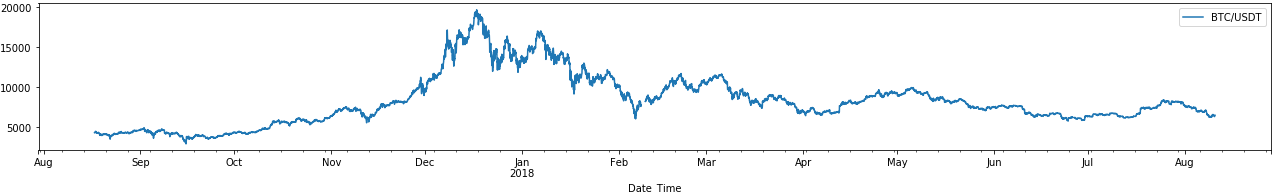

In [389]:
btcusdt.plot(figsize=(18, 3))

**Сreation of dataframe with all tickers**

In [527]:
all_df = btcusdt.join(ticker_dfs)
all_df.dropna(inplace=True) # After dropna period decreases. It may be worth replacing NaN values. 
all_df = all_df.loc["2018-06-28": "2018-07-01"]
all_df.head(3)

,BTC/USDT,XRP/BTC,QTUM/BNB,OMG/BTC,XRP/ETH,ZEC/ETH,ZRX/BTC,QTUM/ETH,ETC/BTC,XRP/BNB,...,XMR/ETH,LTC/USDT,XLM/BNB,ADA/BTC,LTC/BNB,ETC/USDT,ZRX/ETH,XLM/BTC,LTC/BTC,DASH/BTC
Date_Time,,,,,,,,,,,,,,,,,,,,,
2018-06-28 00:00:00,6117.50,0.000077,0.62696,0.001173,0.001080,0.37113,0.000104,0.020075,0.002499,0.03354,...,0.29385,80.03,0.01369,0.000021,5.71,15.2929,0.001456,0.000031,0.013083,0.036995
2018-06-28 01:00:00,6139.00,0.000077,0.62564,0.001172,0.001074,0.38318,0.000104,0.020110,0.002504,0.03336,...,0.29537,80.79,0.01358,0.000021,5.73,15.3519,0.001454,0.000031,0.013177,0.037323
2018-06-28 02:00:00,6133.73,0.000077,0.62913,0.001181,0.001066,0.38194,0.000105,0.020004,0.002523,0.03354,...,0.29185,80.60,0.01354,0.000021,5.72,15.4501,0.001457,0.000031,0.013138,0.037343


In [528]:
all_df.index

DatetimeIndex(['2018-06-28 00:00:00', '2018-06-28 01:00:00',
               '2018-06-28 02:00:00', '2018-06-28 03:00:00',
               '2018-06-28 04:00:00', '2018-06-28 05:00:00',
               '2018-06-28 06:00:00', '2018-06-28 07:00:00',
               '2018-06-28 08:00:00', '2018-06-28 09:00:00',
               '2018-06-28 10:00:00', '2018-06-28 11:00:00',
               '2018-06-28 12:00:00', '2018-06-28 13:00:00',
               '2018-06-28 14:00:00', '2018-06-28 15:00:00',
               '2018-06-28 16:00:00', '2018-06-28 17:00:00',
               '2018-06-28 18:00:00', '2018-06-28 19:00:00',
               '2018-06-28 20:00:00', '2018-06-28 21:00:00',
               '2018-06-28 22:00:00', '2018-06-28 23:00:00',
               '2018-06-29 00:00:00', '2018-06-29 01:00:00',
               '2018-06-29 02:00:00', '2018-06-29 03:00:00',
               '2018-06-29 04:00:00', '2018-06-29 05:00:00',
               '2018-06-29 06:00:00', '2018-06-29 07:00:00',
               '2018-06-

**Convert missing to USDT**

In [529]:
def not_quoted_by(currency, df):
    return list(filter(lambda t: f"/{currency}" not in t, df.columns))

In [530]:
not_usdt_df = all_df[not_quoted_by('USDT', all_df)]
not_usdt_df = not_usdt_df[quoted_by('BTC', all_df)]
not_usdt_df.columns

Index(['XRP/BTC', 'OMG/BTC', 'ZRX/BTC', 'ETC/BTC', 'QTUM/BTC', 'ZEC/BTC',
       'BNB/BTC', 'NEO/BTC', 'ETH/BTC', 'XMR/BTC', 'ADA/BTC', 'XLM/BTC',
       'LTC/BTC', 'DASH/BTC'],
      dtype='object')

In [531]:
converted_usdt_df = DataFrame()

for ticker in not_usdt_df.columns:
    base, quoted = ticker.split('/')
    new_ticker = f"{base}/USDT"
    if new_ticker not in all_df:
        converted_usdt_df[new_ticker] = not_usdt_df[ticker] * all_df[f"BTC/USDT"]
    
converted_usdt_df.head(3)

,OMG/USDT,ZRX/USDT,ZEC/USDT,XMR/USDT,DASH/USDT
Date_Time,,,,,
2018-06-28 00:00:00,7.175827,0.633345,161.905755,127.617168,226.316913
2018-06-28 01:00:00,7.194908,0.635693,168.644469,129.747765,229.125897
2018-06-28 02:00:00,7.243935,0.643980,168.303417,128.808330,229.051879


**Normalization**

In [532]:
def normalize(df):
    for ticker in df.columns:
        df[ticker] = StandardScaler().fit_transform(
            df[ticker].values.reshape(-1, 1))
    return df

In [533]:
all_df = normalize(all_df)
converted_usdt_df = normalize(converted_usdt_df)

**Split by quoted currency**

In [534]:
def quoted_by(currency, df):
    return list(filter(lambda t: f"/{currency}" in t, df.columns))

In [535]:
btc_df = all_df[quoted_by('BTC', all_df)]
eth_df = all_df[quoted_by('ETH', all_df)]
bnb_df = all_df[quoted_by('BNB', all_df)]

In [536]:
usdt_df = all_df[quoted_by('USDT', all_df)]
usdt_df.head(3)

,BTC/USDT,NEO/USDT,XRP/USDT,ETH/USDT,QTUM/USDT,XLM/USDT,BNB/USDT,ADA/USDT,LTC/USDT,ETC/USDT
Date_Time,,,,,,,,,,
2018-06-28 00:00:00,-0.278600,0.251778,1.080408,-0.167998,1.332226,0.490019,-1.357390,-0.204400,0.510456,-0.286212
2018-06-28 01:00:00,-0.169892,0.387603,1.233746,0.005493,1.530696,0.383171,-0.953077,-0.117636,0.778835,-0.187727
2018-06-28 02:00:00,-0.196538,0.447082,1.160848,0.273304,1.559883,0.284141,-1.043887,-0.079211,0.711740,-0.023808


In [537]:
converted_usdt_df = usdt_df.join(converted_usdt_df)
converted_usdt_df.head(3)

,BTC/USDT,NEO/USDT,XRP/USDT,ETH/USDT,QTUM/USDT,XLM/USDT,BNB/USDT,ADA/USDT,LTC/USDT,ETC/USDT,OMG/USDT,ZRX/USDT,ZEC/USDT,XMR/USDT,DASH/USDT
Date_Time,,,,,,,,,,,,,,,
2018-06-28 00:00:00,-0.278600,0.251778,1.080408,-0.167998,1.332226,0.490019,-1.357390,-0.204400,0.510456,-0.286212,-0.311161,-0.667365,-0.298373,0.060273,-0.442656
2018-06-28 01:00:00,-0.169892,0.387603,1.233746,0.005493,1.530696,0.383171,-0.953077,-0.117636,0.778835,-0.187727,-0.263409,-0.634137,0.679286,0.479746,-0.100957
2018-06-28 02:00:00,-0.196538,0.447082,1.160848,0.273304,1.559883,0.284141,-1.043887,-0.079211,0.711740,-0.023808,-0.140712,-0.516899,0.629806,0.294789,-0.109961


**Sort by ticker**

In [538]:
def weigh_quoted(quoted):
    pos = ['USDT', 'BTC', 'ETH', 'BNB'].index(quoted) + 1 
    return pos * 1000

In [539]:
def weigh_base(base):
    # TODO: Sort by coinmarcetcup top
    bases = [
       'BTC', 'XRP', 'ETH', 'XLM', 'LTC', 'USDT', 'ADA',
       'XMR', 'DASH', 'BNB', 'NEO', 'ETC', 'ZEC', 'MKR',
       'DOGE', 'ZRX', 'OMG', 'DCR', 'QTUM']
    try:
        weigh = bases.index(base)
    except ValueError:
        weigh = 999
    return weigh

In [540]:
def weigh_ticker(ticker):
    base, quoted = ticker.split('/')
    return weigh_quoted(quoted) + weigh_base(base)

In [541]:
def sorted_by_ticker(df):
    tickers = list(df.columns)
    sorted_tickers = sorted(tickers, key=weigh_ticker)
    return df[sorted_tickers]

In [542]:
all_df = sort_tickers(all_df)
converted_usdt_df = sort_tickers(converted_usdt_df)
usdt_df = sort_tickers(usdt_df)
btc_df = sort_tickers(btc_df)
eth_df = sort_tickers(eth_df)
bnb_df = sort_tickers(bnb_df)

**All time correlation plot**

In [543]:
def btcusdt_plotter(ax, btcusdt, param_dict=None):
    if param_dict is None:
        param_dict = {}
    out = ax.plot(btcusdt, label='BTC/USDT', **param_dict)
    plt.legend()
    return out

In [544]:
def corr_matrix_plotter(ax, corr, title='', colormap='RdYlGn'):    
    if title:
        ticks = range(len(corr.columns))
        labels = list(corr.columns)
        ax.set_xticks(ticks)
        ax.set_yticks(ticks)
        ax.set_xticklabels(labels, rotation='vertical')
        ax.set_yticklabels(labels)
        ax.set_title(title)
        
    cmap = cm.get_cmap(colormap, 256)
    im = ax.imshow(corr, interpolation="nearest", cmap=cmap)
    return im

In [545]:
def calc_mean(corr):
    return round((corr.mean().mean()), 4)

In [546]:
def all_plotter():
    start_date, end_date = all_df.index[0], all_df.index[-1]
    btcusdt_period = btcusdt.loc[start_date: end_date]
    
    fig = plt.figure(constrained_layout=True, figsize=(20, 10))
    gs = fig.add_gridspec(3, 5)
    
    all_corr = all_df.corr()
    ax1 = fig.add_subplot(gs[:-1, :2])
    im = corr_matrix_plotter(
        ax1, all_corr, 
        title=f"All Tickers\nMean abs value = {abs(calc_mean(all_corr))}")

    # Splited by quoted currency
    usdt_corr = converted_usdt_df.corr()
    ax2 = fig.add_subplot(gs[0, 2])
    corr_matrix_plotter(
        ax2, usdt_corr,
        title=f"Converted USDT\nMean abs value = {abs(calc_mean(usdt_corr))}")
    
    btc_corr = btc_df.corr()
    ax3 = fig.add_subplot(gs[0, 3])
    corr_matrix_plotter(
        ax3, btc_corr,
        title=f"BTC\nMean abs value = {abs(calc_mean(btc_corr))}")
      
    eth_corr = eth_df.corr()
    ax4 = fig.add_subplot(gs[1, 2])
    corr_matrix_plotter(
        ax4, eth_corr,
        title=f"ETH\nMean abs value = {abs(calc_mean(eth_corr))}")
    
    bnb_corr = bnb_df.corr()
    ax5 = fig.add_subplot(gs[1, 3])
    corr_matrix_plotter(
        ax5, bnb_corr,
        title=f"BNB\nMean abs value = {abs(calc_mean(bnb_corr))}")
    
    ax6 = fig.add_subplot(gs[:-1, -1])
    ax6.set_axis_off()
    fig.colorbar(im, ax=ax6, ticks=[1, 0, -1])
    
    ax7 = fig.add_subplot(gs[-1, :])
    ax7.set_title(f"Period {start_date} to {end_date}")
    btcusdt_plotter(ax7, btcusdt_period)

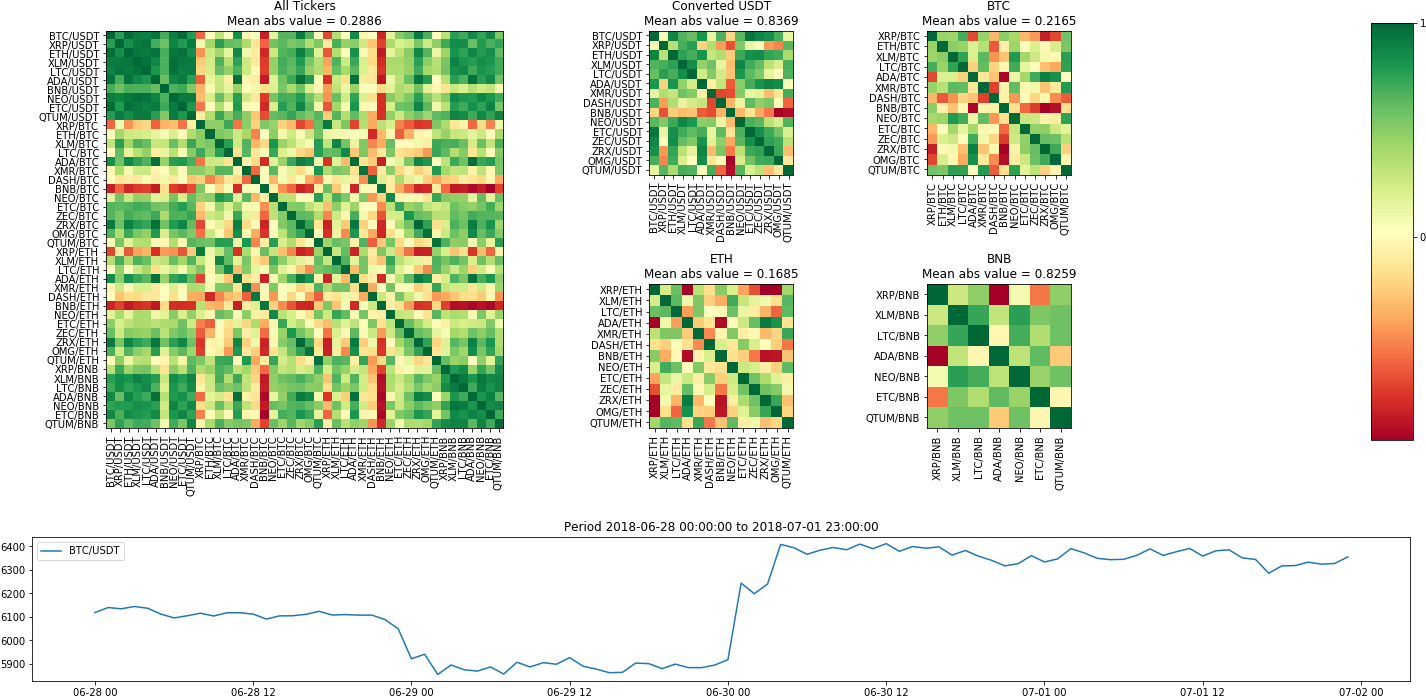

In [547]:
all_plotter()

**Getting rolling windows**

In [25]:
def get_edges(dataframe):
    indexes = dataframe.index
    start_date = indexes[0]
    end_date = indexes[-1]
    return start_date, end_date

In [26]:
edges = get_edges(ration_dataframe)
edges

(Timestamp('2018-06-12 05:00:00'), Timestamp('2018-08-10 15:00:00'))

In [27]:
edges[1] - edges[0] 

Timedelta('59 days 10:00:00')

In [28]:
def create_rolling_dataframes(dataframe, rolling_period, start_date, end_date):
    rolling_dataframes = []
    counter = start_date + rolling_period
    
    while counter <= end_date:
        timedelta = counter - start_date
        window = f"{timedelta.days}D"

        rolling_dataframe = ration_dataframe.rolling(window)
        rolling_dataframes.append((window, rolling_dataframe))
        counter += rolling_period

    return rolling_dataframes

In [29]:
rolling_dataframes = create_rolling_dataframes(ration_dataframe, Timedelta('7 days'), *edges)
rolling_dataframes[0]

('7D',
 Rolling [window=604800000000000,min_periods=1,center=False,win_type=freq,axis=0])

In [30]:
def corr_rolling(dataframe):
    return dataframe[0], dataframe[1].corr()

In [31]:
rolling_corrs = Pool().map(corr_rolling, rolling_dataframes)

In [32]:
len(rolling_corrs)

8

In [33]:
import os

def plot_rolling_corr(rolling_corr_day, title, window_size, filename):
    if not os.path.exists(f"data/plots/{window_size}"):
        os.makedirs(f"data/plots/{window_size}")
    plot_corr(rolling_corr_day, title=title, filename=filename)

In [34]:
def create_rolling_plots(rolling):
    window_size, rolling_corr = rolling
    datetimes = rolling_corr.index.levels[0]
    dates = set(map(lambda x: x.date(), datetimes))
    for date in dates:
        title = f"[{window_size}] {date}"
        filename = f"{window_size}/{date}"
        plot_rolling_corr(rolling_corr.loc[f"{date} 12:00:00"], title, window_size, filename)

KeyboardInterrupt: 

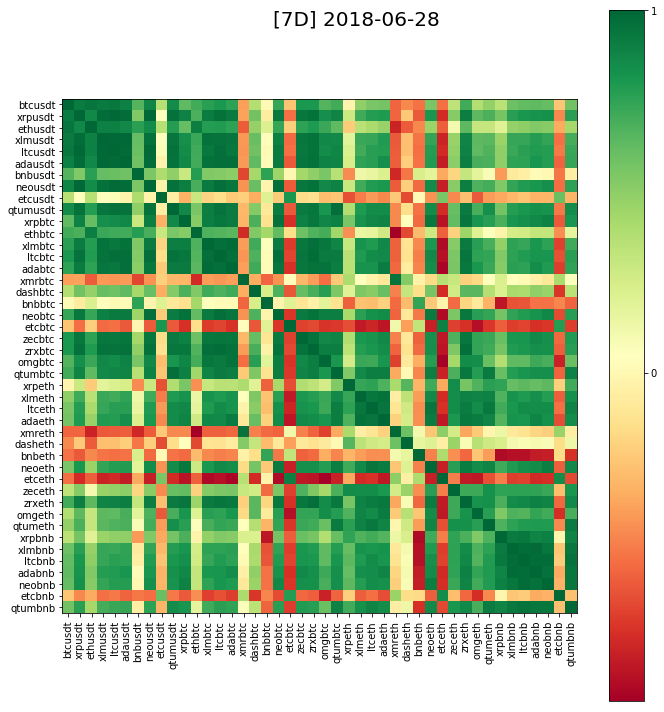

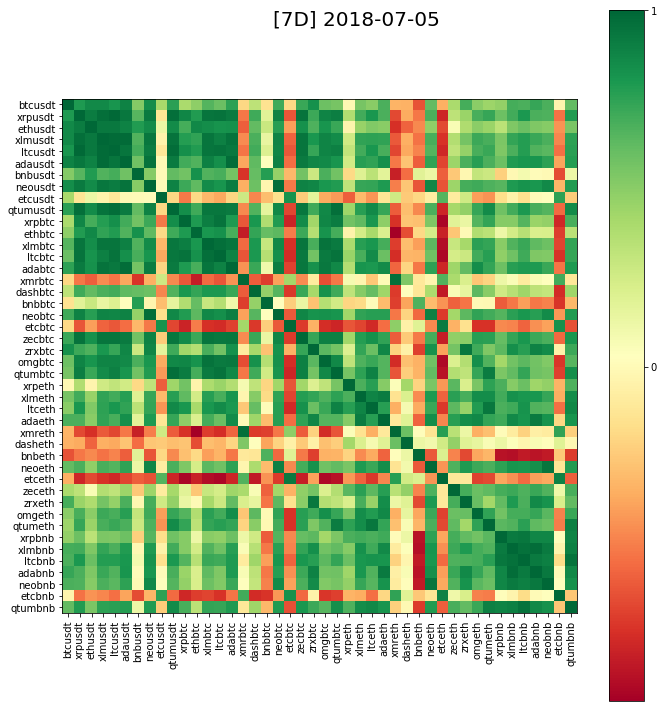

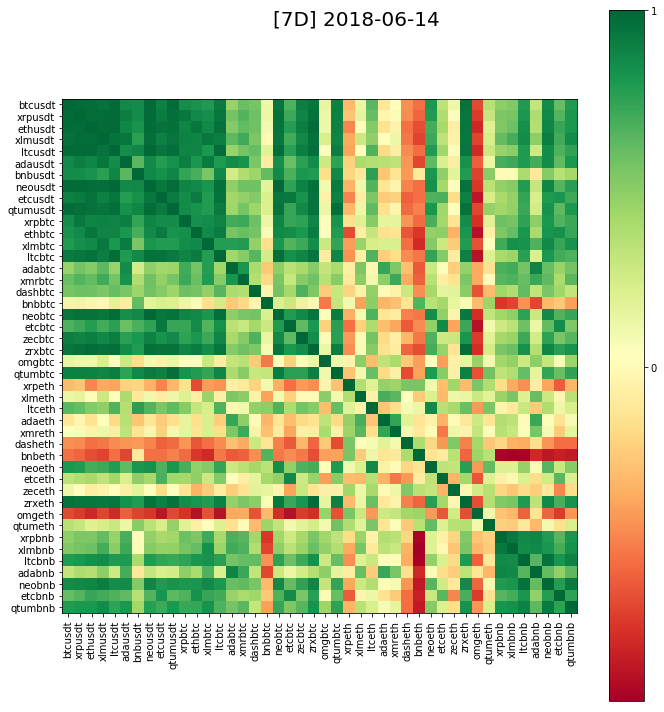

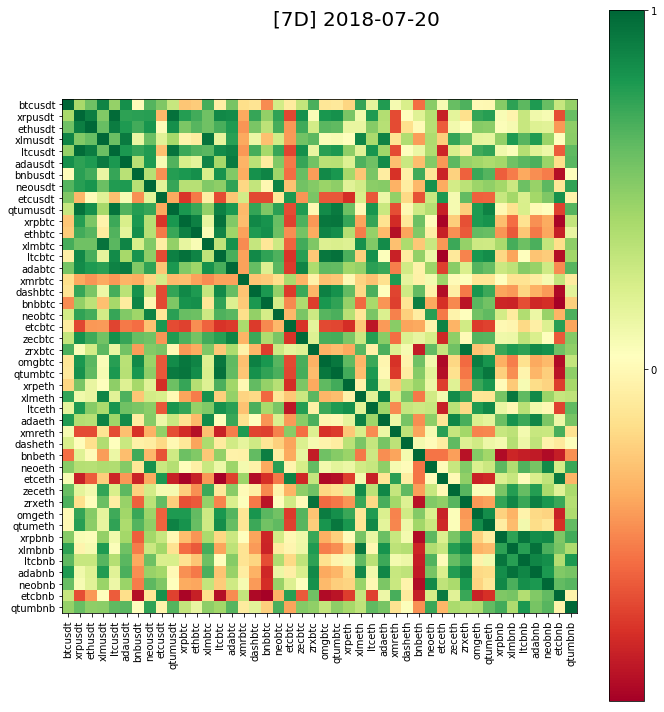

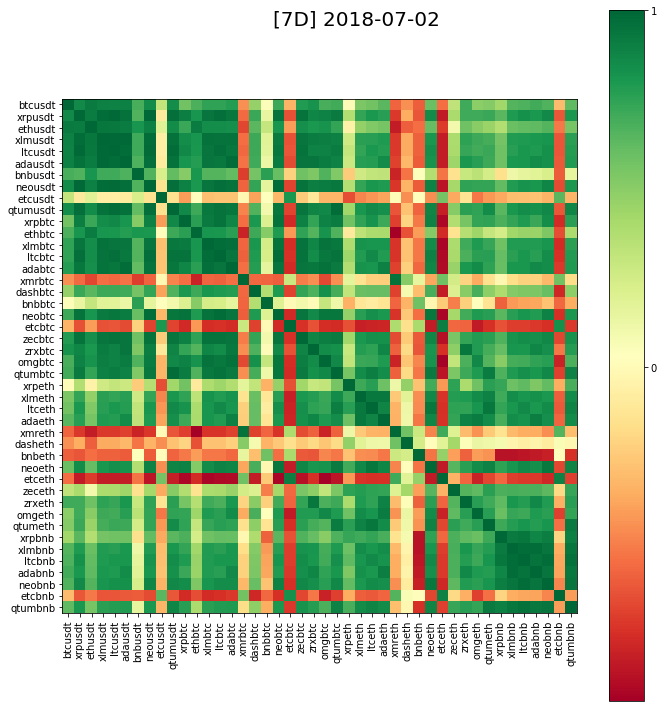

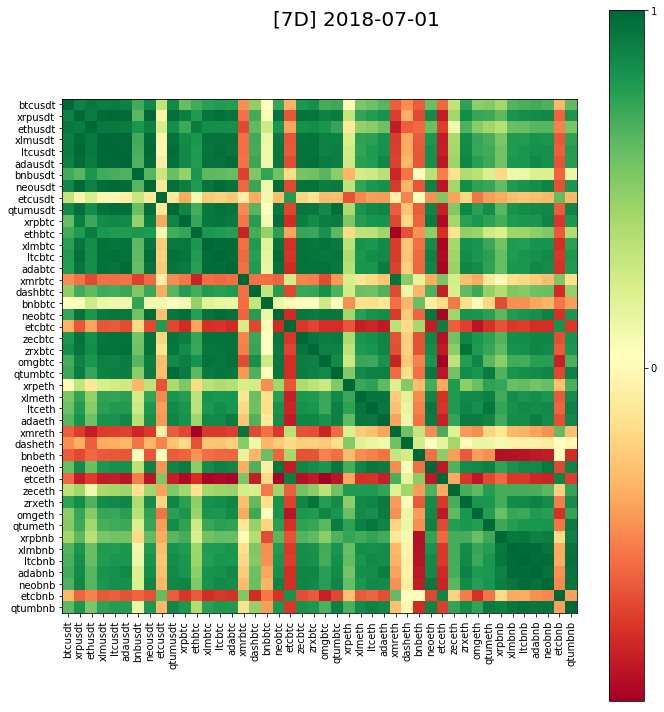

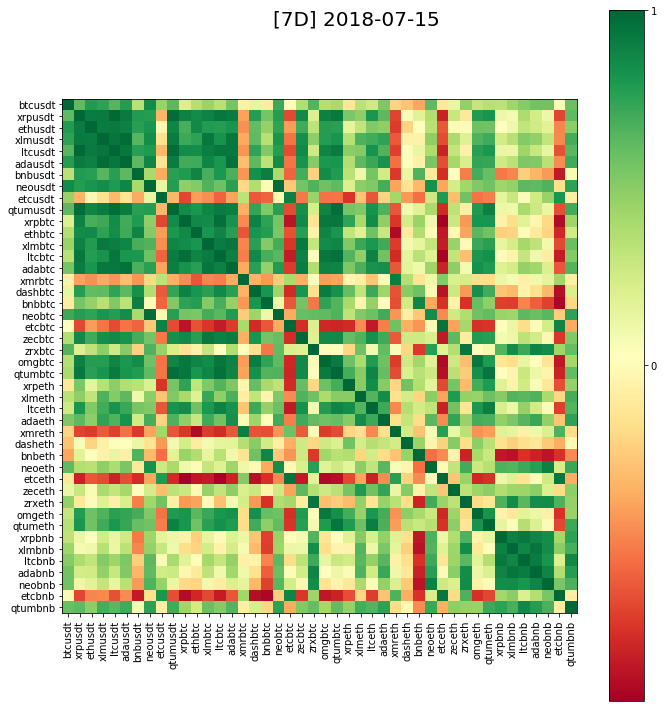

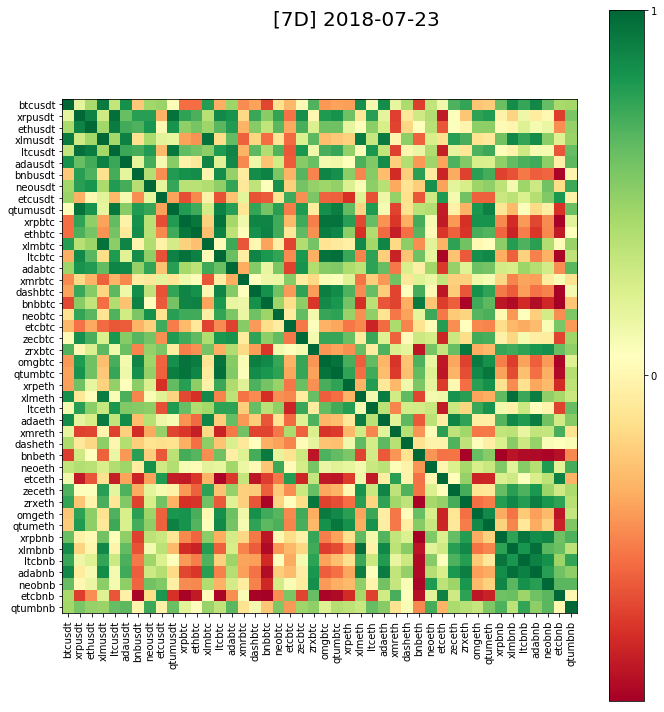

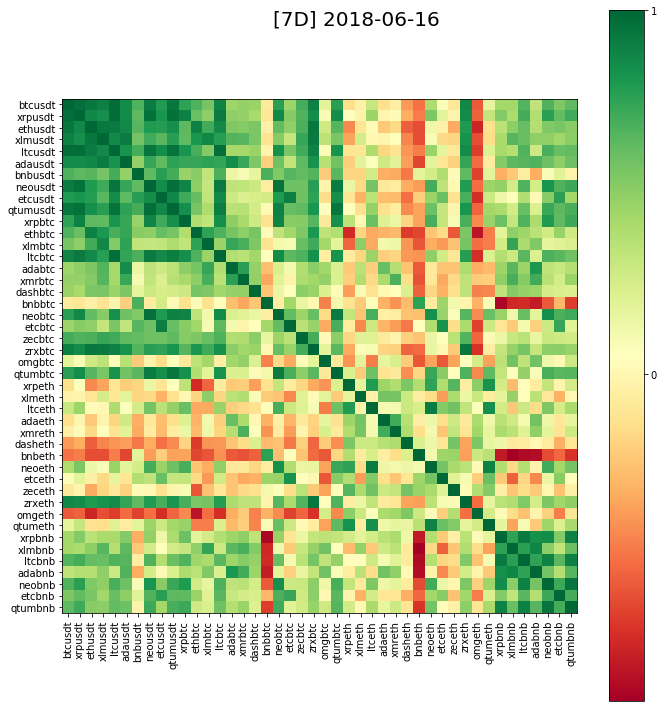

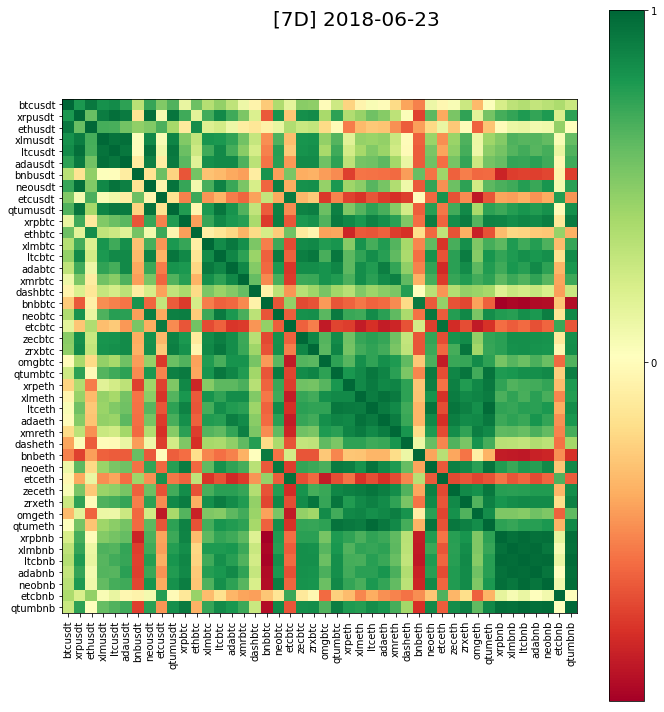

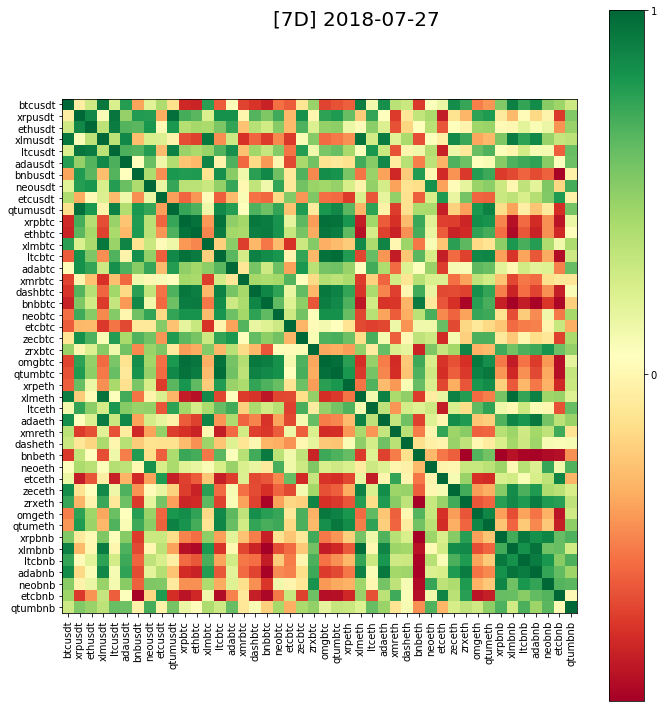

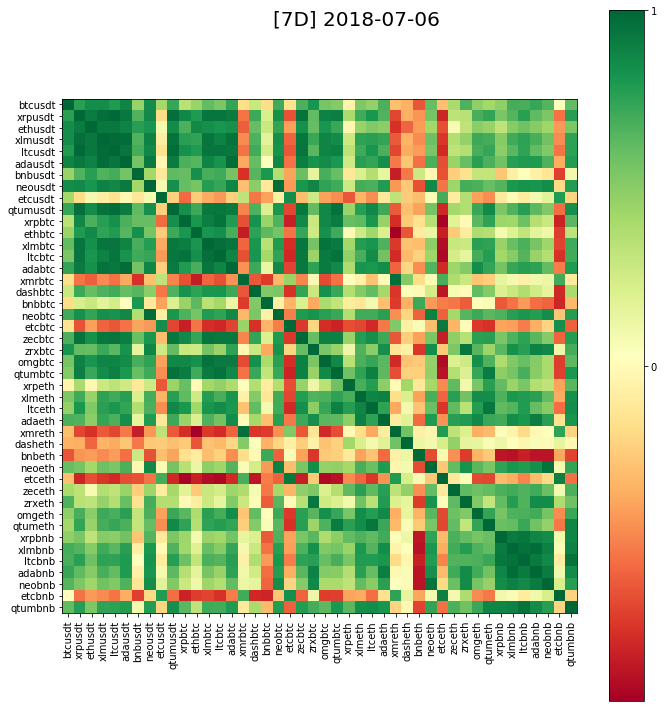

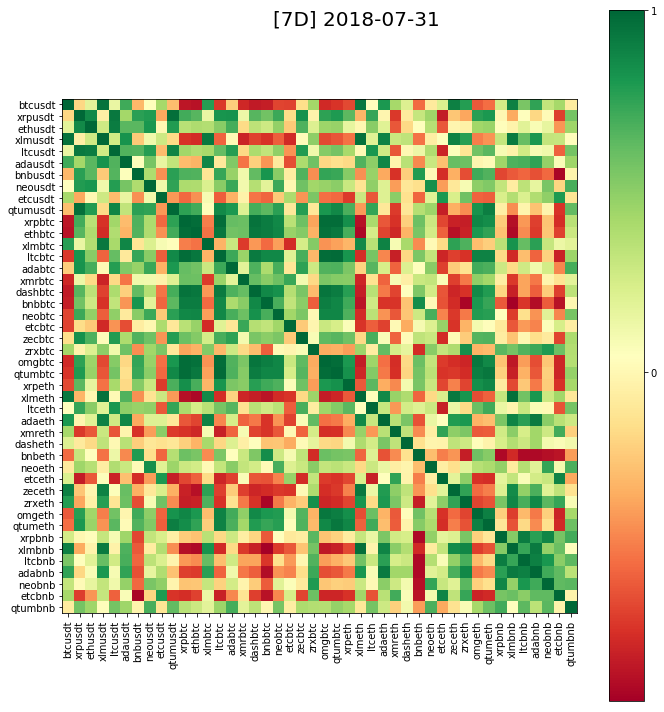

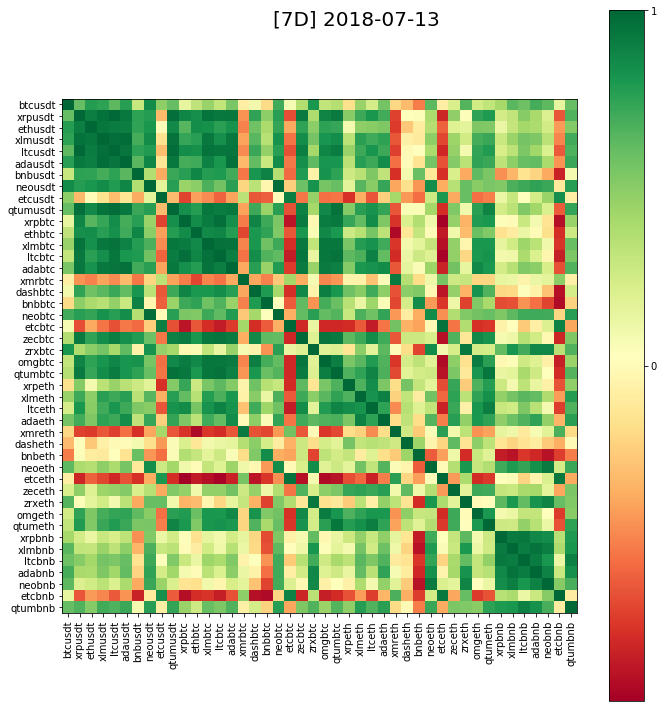

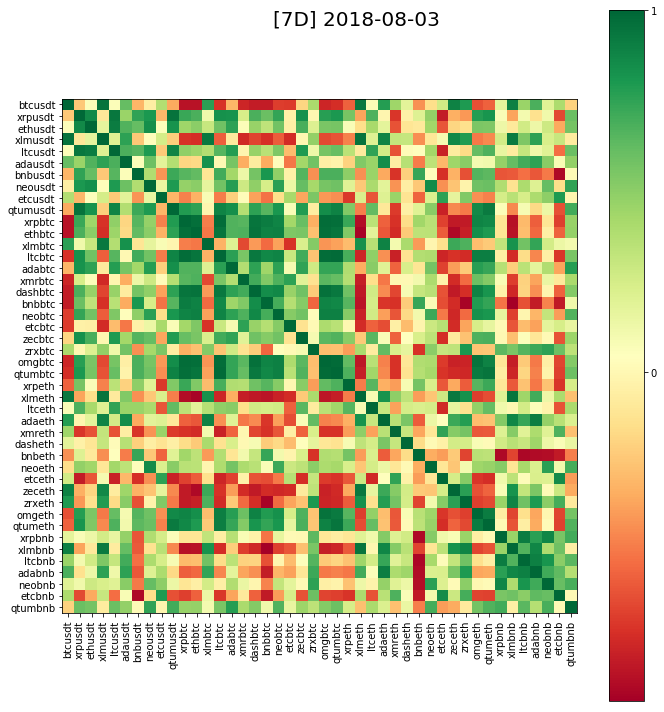

In [35]:
# Pool(processes=4).
tuple(map(create_rolling_plots, rolling_corrs))

,btcusdt
Date_Time,
2017-08-17 07:00:00,4308.83
2017-08-17 08:00:00,4315.32
2017-08-17 09:00:00,4324.35
2017-08-17 10:00:00,4349.99
2017-08-17 11:00:00,4360.69


In [38]:
window_7D, rolling_corr_7D = rolling_corrs[0]

In [99]:
datetimes_7D = rolling_corr_7D.index.levels[0]
dates_7D = sorted(list(set(map(lambda x: x.date(), datetimes_7D))))

In [72]:
corr_7D = rolling_corr_7D.loc[f"{dates_7D[0]} 12:00:00"]
mean_abs_corr_7D = abs(calc_mean(corr))
# corr_7D
mean_abs_corr_7D

0.1797

In [ ]:
corr_7D = rolling_corr_7D.loc[f"{dates_7D[0]} 12:00:00"]

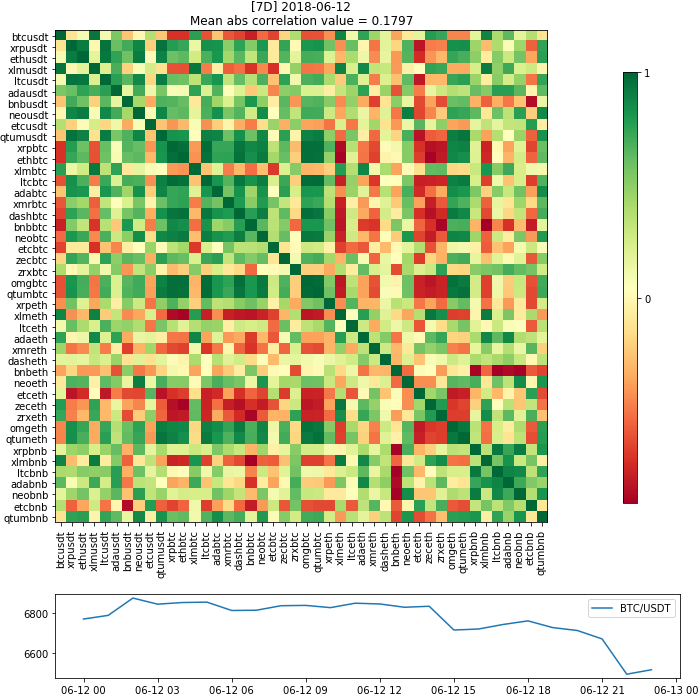

In [106]:
fig = plt.figure(constrained_layout=True, figsize=(10, 10))
gs = fig.add_gridspec(5, 5)

ax1 = fig.add_subplot(gs[:4, :-1])
ax1.set_title(f"[{window_7D}] {dates_7D[0]}\nMean abs correlation value = {mean_abs_corr_7D}")
im = plot_main_corr(ax1, corr)

ax2 = fig.add_subplot(gs[4, :])
btcusdt_plotter(ax2, btcusdt.loc[btcusdt.index.date == dates_7D[0]])

ax3 = fig.add_subplot(gs[:4, -1])
ax3.set_axis_off()
fig.colorbar(im, ax=ax3, ticks=[1, 0, -1])
plt.tight_layout()

In [90]:
mean_abs_corr = abs(calc_mean(corr))
mean_abs_corr

0.1797

In [46]:
def plot_rolling_all(ax, corr, colormap='RdYlGn'):    
    cmap = cm.get_cmap(colormap, 256)
    cax = ax.imshow(corr, interpolation="nearest", cmap=cmap)
    ax.set_axis_off()
    out = ax.plot()
    return out

In [47]:
dates_7D = sorted(list(dates_7D))

In [48]:
corr_cells = len(dates_7D)
corr_cells

60

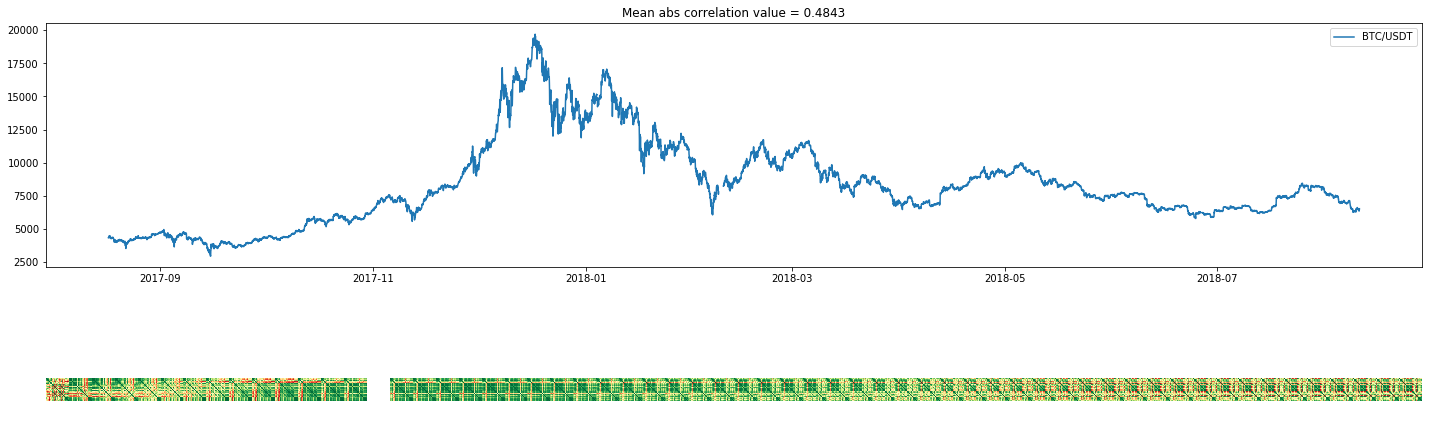

In [63]:
fig = plt.figure(constrained_layout=True, figsize=(25, 5)) # 20 12/8
gs = fig.add_gridspec(2, corr_cells)
gs.update(wspace=0, hspace=0)

for idx, date in enumerate(dates_7D):
    date_ax = fig.add_subplot(gs[1, idx])
#     date_ax.set_aspect('equal')
    plot_rolling_all(date_ax, rolling_corr_7D.loc[f"{date} 12:00:00"])

ax2 = fig.add_subplot(gs[:1, :])
ax2.set_title(f"Mean abs correlation value = {mean_abs_corr}")
btcusdt_plotter(ax2, btcusdt)
fig.savefig('test.png', bbox_inches='tight')

In [82]:
start_date, end_date = dates_7D[0], dates_7D[-1]
start_date, end_date

(datetime.date(2018, 6, 12), datetime.date(2018, 8, 10))

In [89]:
btcusdt = btcusdt.loc[start_date: end_date]

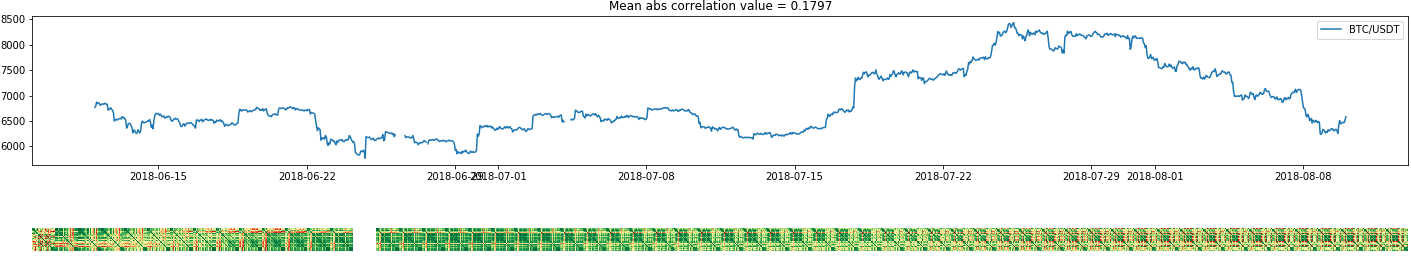

In [109]:
fig = plt.figure(constrained_layout=True, figsize=(25, 5)) # 20 12/8
fig.tight_layout()
gs = fig.add_gridspec(2, corr_cells)
gs.update(wspace=0, hspace=0)

for idx, date in enumerate(dates_7D):
    date_ax = fig.add_subplot(gs[1, idx])
#     date_ax.set_aspect('equal')
    plot_rolling_all(date_ax, rolling_corr_7D.loc[f"{date} 12:00:00"])

ax2 = fig.add_subplot(gs[:1, :])
ax2.set_title(f"Mean abs correlation value = {mean_abs_corr}")
btcusdt_plotter(ax2, btcusdt)
fig.savefig('test.png', bbox_inches='tight')